## 一维的噪声

#### Hermit 插值

这是一种插值方法，用多项式对函数进行插值，使得插值函数在对应点处满足函数值和导数值的条件。

例如：有两个点，要满足函数值和一阶导数值的条件，一个四个约束条件，可以解出 4 个未知数，对应的 Hermit 插值函数就是三次函数。

在 $(0, 0)$ 和 $(1, 1)$ 之间插值，导数值为 $f'(0) = f'(1) = 0$

可以用待定系数法计算出插值函数：$g(x) = x^2 (3 - 2x)$

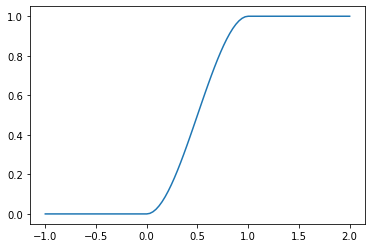

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def hermit(x):
    if x < 0.0:
        return 0
    if x > 1.0:
        return 1
    return x ** 2 * (3 - 2 * x)

vhermit = np.vectorize(hermit, otypes=[float])

x = np.linspace(-1, 2, 100)

fig, ax = plt.subplots()
ax.plot(x, vhermit(x))

#### 一维的噪声的实现

- 如果 x 是整数，输出对应的随机数
- 如果 x 是浮点数，对左右两侧的函数值进行插值，输出插值的结果

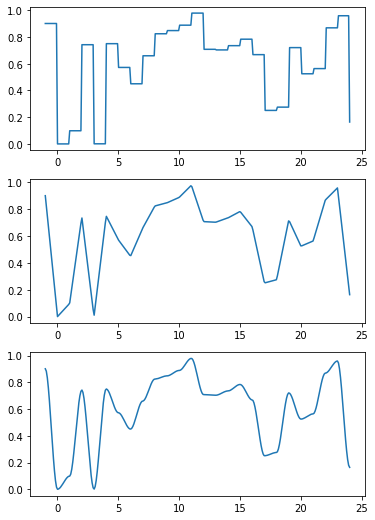

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def fract(x):
    return x - np.floor(x)

def mix(a, b, x):
    return a * (1 - x) + b * x

def rand(x):
    return fract(np.sin(x) * 100000.0)

def hermit(x):
    if x < 0.0:
        return 0
    if x > 1.0:
        return 1
    return x ** 2 * (3 - 2 * x)

vhermit = np.vectorize(hermit, otypes=[float])

x = np.linspace(-1, 24, 300)
i_part = np.floor(x)
f_part = x - i_part

fig = plt.figure(figsize=(6, 9))

# 不进行插值
ax1 = fig.add_subplot(311)
ax1.plot(x, rand(i_part))

# 线性插值
ax2 = fig.add_subplot(312)
ax2.plot(x, mix(rand(i_part), rand(i_part + 1.0), f_part))

# Hermit 插值
ax3 = fig.add_subplot(313)
ax3.plot(x, mix(rand(i_part), rand(i_part + 1.0), vhermit(f_part)))

## 二维噪声

一维噪声的原理是在直线上的两个点之间插值

二维噪声的原理是在平面上的四个点之间插值

二维平面中四个点之间进行线性插值的示意图：


<img src="./img/interpolation-2d.png" alt="interpolation-2d.png" width=450 />


或者这样理解：


<img src="./img/interpolation-2d2.png" alt="interpolation-2d.png" width=450 />

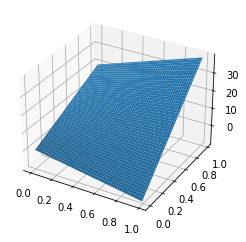

In [15]:
import numpy as np
import matplotlib.pyplot as plt


def fract(_x):
    return _x - np.floor(_x)


def mix(_a, _b, _x):
    return _a * (1 - _x) + _b * _x


fig = plt.figure()
ax = fig.add_subplot(projection="3d")

x = np.linspace(0, 0.99, 100)
y = np.linspace(0, 0.99, 100)
x, y = np.meshgrid(x, y)
u_x = fract(x)
u_y = fract(y)
a, b, c, d = 0, -10, 20, 40
z = mix(a, b, u_x) + mix(c-a, d-b, u_x) * u_y

ax.plot_surface(x, y, z)

将插值系数换成 Hermit 系数，就能得到二维的 Hermit 插值

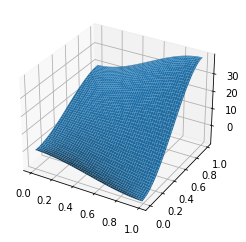

In [16]:
import numpy as np 
import matplotlib.pyplot as plt 

def fract(_x):
    return _x - np.floor(_x)

def mix(_a, _b, _x):
    return _a * (1 - _x) + _b * _x

def hermit(x):
    if x < 0.0:
        return 0
    if x > 1.0:
        return 1
    return x ** 2 * (3 - 2 * x)

vhermit = np.vectorize(hermit, otypes=[float])

fig = plt.figure()
ax = fig.add_subplot(projection="3d")

x = np.linspace(0, 0.99, 100)
y = np.linspace(0, 0.99, 100)
x, y = np.meshgrid(x, y)
u_x = vhermit(fract(x))
u_y = vhermit(fract(y))
a, b, c, d = 0, -10, 20, 40
z = mix(a, b, u_x) + mix(c-a, d-b, u_x) * u_y

ax.plot_surface(x, y, z)

将二维的 Hermit 插值应用在噪声上，可以得到如下的效果：

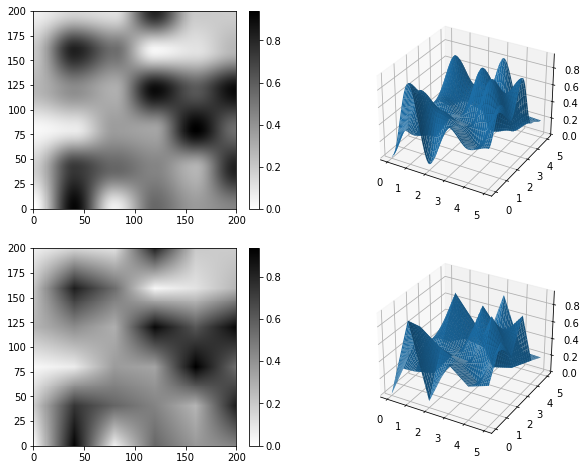

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

def fract(x):
    return x - np.floor(x)

def rand(s, t):
    return fract(np.sin(12.9898 * s + 78.233 * t) * 43758.5453123)

def hermit(x):
    if x < 0.0:
        return 0
    if x > 1.0:
        return 1
    return x ** 2 * (3 - 2 * x)

def mix(_a, _b, _x):
    return _a * (1 - _x) + _b * _x

vhermit = np.vectorize(hermit, otypes=[float])

x, y = np.meshgrid(np.linspace(0, 5, 200), np.linspace(0, 5, 200))
x_int, y_int = np.floor(x), np.floor(y)
x_float, y_float = fract(x), fract(y)

# 插值系数
u_x, u_y = vhermit(x_float), vhermit(y_float)

# 为整数部分计算随机数
a = rand(x_int, y_int)
b = rand(x_int + 1.0, y_int)
c = rand(x_int, y_int + 1.0)
d = rand(x_int + 1.0, y_int + 1.0)

# 为每个位置计算一个随机值
data = mix(a, b, u_x) + mix(c-a, d-b, u_x) * u_y
data2 = mix(a, b, x_float) + mix(c-a, d-b, x_float) * y_float

# 为随机值映射颜色
cmap = LinearSegmentedColormap.from_list("bw", list(zip(
    [0.0, 1.0],
    ["white", "black"]
)))

fig = plt.figure(figsize=(10, 8))

# Hermit 插值：绘制颜色映射的图
ax1 = plt.subplot(221)
psm = ax1.pcolormesh(data, cmap=cmap)
fig.colorbar(psm, ax=ax1)

# Hermit 插值：绘制三维曲面的图
ax2 = plt.subplot(222, projection="3d")
ax2.plot_surface(x, y, data)

# 线性插值：绘制颜色映射的图
ax3 = plt.subplot(223)
psm = ax3.pcolormesh(data2, cmap=cmap)
fig.colorbar(psm, ax=ax3)

# 线性插值：绘制三维曲面的图
ax4 = plt.subplot(224, projection="3d")
ax4.plot_surface(x, y, data2)

## Cellular Noise

这种 Noise 是基于距离场的

场景中有几个参考点，计算像素点到参考点的最短距离，用这个距离作为颜色

<img src="./img/distance-field.png" width=200 />

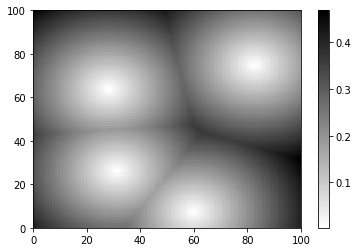

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# 为随机值映射颜色
cmap = LinearSegmentedColormap.from_list("bw", list(zip(
    [0.0, 1.0],
    ["white", "black"]
)))

def distance(x, y, p):
    return np.sqrt((x - p[0]) ** 2 + (y - p[1]) ** 2)

vmin = np.vectorize(lambda a, b: min(a, b), otypes=[float])

size = 100
x, y = np.meshgrid(np.linspace(0, 1, size), np.linspace(0, 1, size))

# 四个固定的点
p1, p2, p3, p4 = [0.83, 0.75], [0.60, 0.07], [0.28, 0.64], [0.31, 0.26]

# 计算距离场
data = np.repeat(1, size * size).reshape(size, size)
for p in [p1, p2, p3, p4]:
    data = vmin(data, distance(x, y, p))

fig, ax = plt.subplots()
psm = ax.pcolormesh(data, cmap=cmap)
fig.colorbar(psm, ax=ax)

#### Tile 优化 Cellular Noise

如果场景中有很多的参考点，那么需要计算像素点和每个参考点的距离

可以预先将场景划分为一个个小的网格，位于中间网格内的像素点，只需要计算到邻近网格中的参考点的最短距离即可。

<img src="./img/distance-field-tile.png" width=200 />

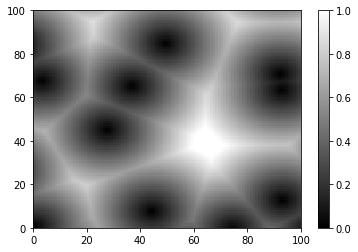

In [7]:
import numpy as np
import matplotlib.pyplot as plt 

# 为随机值映射颜色
cmap = LinearSegmentedColormap.from_list("bw", list(zip(
    [0.0, 1.0],
    ["black", "white"]
)))

def rand2(x, y):
    fract = lambda _x: _x - np.floor(_x)
    u = x * 127.1 + y * 311.7 
    v = x * 269.5 + y * 183.3
    return fract(np.sin(u) * 43758.5453), fract(np.sin(v) * 43758.5453)

def distance(x, y, px, py):
    return np.sqrt((x - px) ** 2 + (y - py) ** 2)

vmin = np.vectorize(lambda a, b: min(a, b), otypes=[float])

size = 100
x, y = np.meshgrid(np.linspace(0, 3, size), np.linspace(0, 3, size))

x_i, y_i = np.floor(x), np.floor(y)
x_f, y_f = x - x_i, y - y_i
data = np.repeat(1, size * size).reshape(size, size)
for i in [-1, 0, 1]:
    for j in [-1, 0, 1]:
        # 计算周围 grid 中参考点的位置
        pos_x, pos_y = rand2(x_i + i, y_i +j)
        pos_x += i 
        pos_y += j

        data = vmin(data, distance(x_f, y_f, pos_x, pos_y))
    
fig, ax = plt.subplots()
psm = ax.pcolormesh(data, cmap=cmap)
fig.colorbar(psm, ax=ax)

## 其他的

进一步了解，可以学习以下内容：

- Value Noise
- Gradient Noise
- Berlin Noise
- Simplex Noise